Le Thi Thu Tra - ITDSIU19058

Nguyen Minh Trang - ITDSIU19020

Phan Vo Phuong Tung - ITDSIU19025

Nguyễn Huỳnh Thủy Tiên ITDSIU19056

Vũ Xuân Linh - ITDSIU19008

Le Trieu Long


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from numpy import array

# Get the data

In [3]:
url = 'https://raw.githubusercontent.com/lephanthutra/PCA-Principle-Components-Analysis/main/sample.csv'
df = pd.read_csv(url)
df

,X1,X2
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.2,0.9


# PCA IMPLEMENTATION

## Step 1: Subtract the Mean

In [4]:
# calculate mean of each attribute in the data
mean = df.mean()
mean

X1    1.82
X2    1.91
dtype: float64

In [7]:
# Subtract the mean
new_df = df - mean
new_df

,X1,X2
0,0.68,0.49
1,-1.32,-1.21
2,0.38,0.99
3,0.08,0.29
4,1.28,1.09
5,0.48,0.79
6,0.18,-0.31
7,-0.82,-0.81
8,-0.32,-0.31
9,-0.62,-1.01


## Step 2: Calcualate the covarance matrix

In [27]:
# calculate the covariance matrix
cov_matrix = new_df.cov()
cov_matrix 

,X1,X2
X1,0.601778,0.604222
X2,0.604222,0.716556


## Step 3: Calculate the eigenvectors and eigenvalues of covariance maxtrix

In [23]:
# function to calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = LA.eig(cov_matrix)

In [25]:
# eigenvalues
eigenvalues = eigenvalues.round(4)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [0.0522 1.2661]


In [26]:
# eigenvectors
eigenvectors = eigenvectors.round(4)
print("Eignvectors:\n", eigenvectors)

Eignvectors:
 [[-0.7398 -0.6728]
 [ 0.6728 -0.7398]]


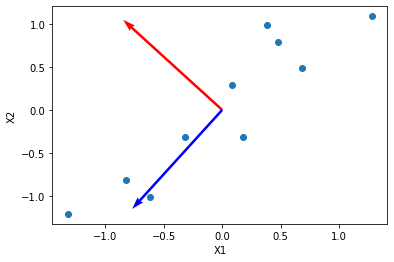

In [101]:
# draw a graph
origin = [0, 0]

# Eigenvector 1
eig_vec1 = eigenvectors[:,0]

# Eigenvector 2
eig_vec2 = eigenvectors[:,1]

# This line below plots the 2d points
plt.scatter(new_df['X1'], new_df['X2'])

plt.xlabel('X1')
plt.ylabel('X2')

plt.quiver(*origin, *eig_vec1, color=['r'], scale=2.5)
plt.quiver(*origin, *eig_vec2, color=['b'], scale=2.5)
plt.show()

- We  realized that the ***blue*** eigenvector goes through the middle of the points, like drawing the best fit.

- The ***red*** eigenvector gives us the other, less important, pattern in the data, that all the points follow the main line (the "blue" one) but are off to the side of the main line by some amount.

## Step 4: Reduce dimensionality and form **feature vector**

**Note**: The eigenvector with the **highest** eigenvalue is the **principal component** of the data set.

### Sort eigenvalues

In [47]:
# sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
sorted_eigenvalues

array([1.2661, 0.0522])

In [48]:
# assign index to each eigenvalue
index_sorted_eigenval = np.argsort(eigenvalues)
index_sorted_eigenval

array([1, 0])

### We can either form a feature vector with both eigenvectors:

In [49]:
# return the feature vector
feature_vector = eigenvectors[:, index_sorted_eigenval]
feature_vector

array([[-0.6728, -0.7398],
       [-0.7398,  0.6728]])

### or we can choose to leave out the smaller, less significant component and only have a signle column:

In [58]:
# significant component feature
sig_cf = eigenvectors[:, index_sorted_eigenval[:1]]
sig_cf

array([[-0.6728],
       [-0.7398]])

In [60]:
# less significant component feature can be removed
less_sig_cf = eigenvectors[:, index_sorted_eigenval[1:]]
less_sig_cf 

array([[-0.7398],
       [ 0.6728]])

## Step 5: Derive the new data

### Row Feature Vector


In [68]:
# transpose feature vector which is also eigenvectors
row_feature_vector = feature_vector.T
row_feature_vector

array([[-0.6728, -0.7398],
       [-0.7398,  0.6728]])

### Row Zero Mean Data

In [69]:
# transpose mean-adjused data
row_zero_mean_data = new_df.T
row_zero_mean_data 

,0,1,2,3,4,5,6,7,8,9
X1,0.68,-1.32,0.38,0.08,1.28,0.48,0.18,-0.82,-0.32,-0.62
X2,0.49,-1.21,0.99,0.29,1.09,0.79,-0.31,-0.81,-0.31,-1.01


### Final Data

FinalData = RowFeatureVector * RowZeroMeanData

In [95]:
final_data = np.matmul(row_feature_vector, row_zero_mean_data)
final_data = pd.DataFrame(final_data.T)
final_data.rename(columns={0: 'new X1', 1: 'new X2'}, inplace = True)
final_data

,new X1,new X2
0,-0.820006,-0.173392
1,1.783254,0.162448
2,-0.988066,0.384948
3,-0.268366,0.135928
4,-1.667566,-0.213592
5,-0.907386,0.176408
6,0.108234,-0.341732
7,1.150934,0.061668
8,0.444634,0.028168
9,1.164334,-0.220852


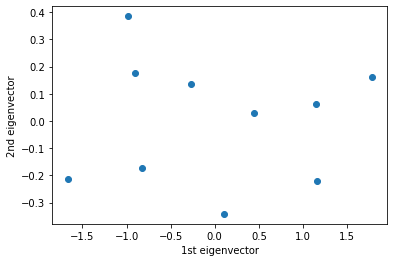

In [104]:
# draw a graph
origin = [0, 0]

# This line below plots the 2d points
plt.scatter(final_data['new X1'], final_data['new X2'])
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.show()

The Final Data gives us:

- The orginal data solely in terms of the vector we chose.

- We have changed our data from being in terms of axes X1 and X2 to now be interms of 2 eigenvectors.